In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

Exploring data:

In [0]:
filePath = "/content/drive/My Drive/Severstal"

Load train.csv as a pandas dataframe

In [4]:
# Read train data images information
original_df = pd.read_csv(filePath+"/train.csv")
original_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


We notice that:
*   image "0002cc93b.jpg" has defect of type 1 only, because it has encoded pixels corresponding to "0002cc93b.jpg_1" but none for "0002cc93b.jpg_2", "0002cc93b.jpg_3", "0002cc93b.jpg_4"
*   Some images contain several types of defects, let's see that:

In [5]:
original_df.loc[56:59]

,ImageId_ClassId,EncodedPixels
56,002fc4e19.jpg_1,146021 3 146275 10 146529 40 146783 46 147038 ...
57,002fc4e19.jpg_2,145658 7 145901 20 146144 33 146386 47 146629 ...
58,002fc4e19.jpg_3,NaN
59,002fc4e19.jpg_4,NaN


*   image "002fc4e19.jpg" has defects of types 1 and 2



Modeify original dataframe:
1.   split ImageId and classId
3.   group by ImageId
2.   remove rows where there is no encoded pixels

In [0]:
def append(col):
  return [x for x in col]

def encode(x):
  res = []
  for i in range(len(x)):
    if isinstance(x[i], str):
      res.append(i+1)
  if len(res) > 0:
    return res
  return None

df = pd.DataFrame(columns=['ImageId','ClassId','EncodedPixels'])

In [11]:
df['ImageId'] = original_df['ImageId_ClassId'].map(lambda x: x.split('_')[0])
df['ClassId'] = original_df['ImageId_ClassId'].map(lambda x: x.split('_')[1])
df['EncodedPixels'] = original_df['EncodedPixels']
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,NaN
2,0002cc93b.jpg,3,NaN
3,0002cc93b.jpg,4,NaN
4,00031f466.jpg,1,NaN


In [12]:
df_gr = df.groupby(by='ImageId', as_index=False).agg(append)
df_gr['ClassId'] = df_gr['EncodedPixels'].apply(lambda x: encode(x))
print("Total number of images = ", df_gr.shape[0])
# df_gr.to_csv(filePath+"/git_hub/csv/df_grouped_classes.csv", index = False)
df_gr.loc[11:14]

Total number of images =  12568


,ImageId,ClassId,EncodedPixels
11,0025bde0c.jpg,"[3, 4]","[nan, nan, 8458 14 8707 35 8963 48 9219 71 947..."
12,002af848d.jpg,[4],"[nan, nan, nan, 290800 6 291055 13 291311 15 2..."
13,002e73b3c.jpg,None,"[nan, nan, nan, nan]"
14,002fc4e19.jpg,"[1, 2]",[146021 3 146275 10 146529 40 146783 46 147038...


Split faulty and non faulty images

In [35]:
faulty_df = df_gr[ df_gr.ClassId.notnull() ]
print("Number of deficient images =  ", faulty_df.shape[0])
# faulty_df.to_csv(filePath+"/git_hub/csv/faulty_df.csv", index = False)
faulty_df.head(6)   

Number of deficient images =   6666


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,[1],[29102 12 29346 24 29602 24 29858 24 30114 24 ...
4,0007a71bf.jpg,[3],"[nan, nan, 18661 28 18863 82 19091 110 19347 1..."
5,000a4bcdd.jpg,[1],[37607 3 37858 8 38108 14 38359 20 38610 25 38...
6,000f6bf48.jpg,[4],"[nan, nan, nan, 131973 1 132228 4 132483 6 132..."
7,0014fce06.jpg,[3],"[nan, nan, 229501 11 229741 33 229981 55 23022..."
11,0025bde0c.jpg,"[3, 4]","[nan, nan, 8458 14 8707 35 8963 48 9219 71 947..."


In [36]:
non_faulty_df = df_gr[ df_gr.ClassId.isnull() ]
print("Number of non deficient images =  ", normal_df.shape[0])
# non_faulty_df.to_csv(filePath+"/git_hub/csv/non_faulty_df.csv", index = False)
non_faulty_df.head()

Number of non deficient images =   5902


,ImageId,ClassId,EncodedPixels
1,00031f466.jpg,None,"[nan, nan, nan, nan]"
2,000418bfc.jpg,None,"[nan, nan, nan, nan]"
3,000789191.jpg,None,"[nan, nan, nan, nan]"
8,001982b08.jpg,None,"[nan, nan, nan, nan]"
9,001d1b355.jpg,None,"[nan, nan, nan, nan]"


In [38]:
faulty_df_str = faulty_df.copy(deep=True)
faulty_df_str.ClassId = faulty_df_str.ClassId.apply(lambda x: ''.join([str(i) for i in x]))
# faulty_df_str.to_csv(filePath+"/git_hub/csv/faulty_df_str.csv", index = False)
faulty_classes_counts = faulty_df_str.ClassId.value_counts()
faulty_classes_counts

3      4759
1       769
4       516
34      284
2       195
13       91
12       35
23       14
123       2
24        1
Name: ClassId, dtype: int64

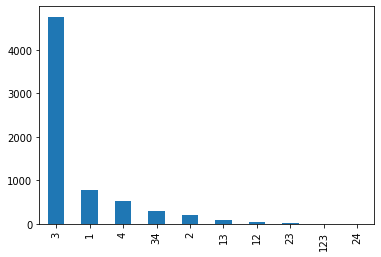

In [42]:
faulty_classes_counts.plot.bar()